# Image feature extraction

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [88]:
img_num = 200

In [96]:
img_num += 1
img = cv2.imread('dataset/training_set/cats/cat.' + str(img_num) + '.jpg')

3


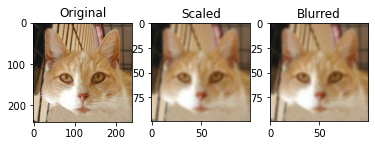

In [101]:
# standardize the size
scaled = cv2.resize(img, (100, 100), interpolation=cv2.INTER_AREA)
#reduce noise with Gaussian Blur, kernal size = (5,5)
blur = cv2.GaussianBlur(scaled, (5,5), 1)
#gray image
gray = cv2.cvtColor(scaled,cv2.COLOR_BGR2GRAY)

#show image with pyplot
plt.figure()

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.title("Scaled")
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,3)
plt.title("Blurred")
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

print(len(img.shape))

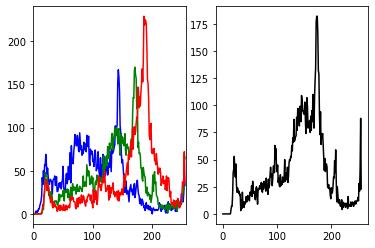

In [102]:
# Histogram
histr = []
color = ('b','g','r')

plt.figure()
plt.subplot(121)
for i,col in enumerate(color):
    histr.append(np.uint(cv2.calcHist([scaled],[i],None,[256],[0,256])).flatten())
    plt.plot(histr[i],color = col)
    plt.xlim([0,256])

plt.subplot(122)
gray_histr = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.plot(gray_histr, color = 'black')

(10000,)


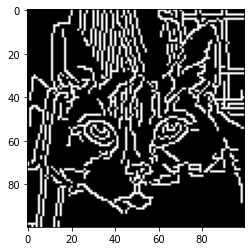

In [103]:
# Edges using Canny Edges Detection
edge = cv2.Canny(scaled,100,200)
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

print(edge.flatten().shape)

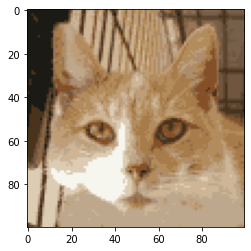

In [104]:
# Color Quantization
Z = scaled.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((scaled.shape))
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))

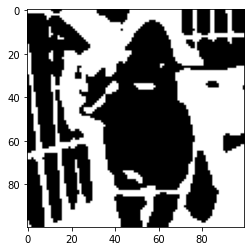

In [68]:
# threshold
gray = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)
thres = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,127,3)
plt.imshow(cv2.cvtColor(thres, cv2.COLOR_BGR2RGB))